In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
    [0.5, 0.5],
    [0.2, 0.8]
])
y = np.array([[0], [1], [1], [0], [0], [1]])


In [31]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)


In [32]:
np.random.seed(42)
input_size = 2
hidden_size = 3
output_size = 1
W1 = np.random.randn(input_size, hidden_size) * 0.1
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.1
b2 = np.zeros((1, output_size))


In [33]:
learning_rate = 0.1
epochs = 1000

losses = []


In [34]:
for epoch in range(epochs):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    y_hat = sigmoid(z2)
    loss = np.mean((y - y_hat) ** 2)
    losses.append(loss)
    d_yhat = (y_hat - y)
    d_z2 = d_yhat * sigmoid_derivative(y_hat)
    dW2 = np.dot(a1.T, d_z2)
    db2 = np.sum(d_z2, axis=0, keepdims=True)
    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, d_z1)
    db1 = np.sum(d_z1, axis=0, keepdims=True)
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

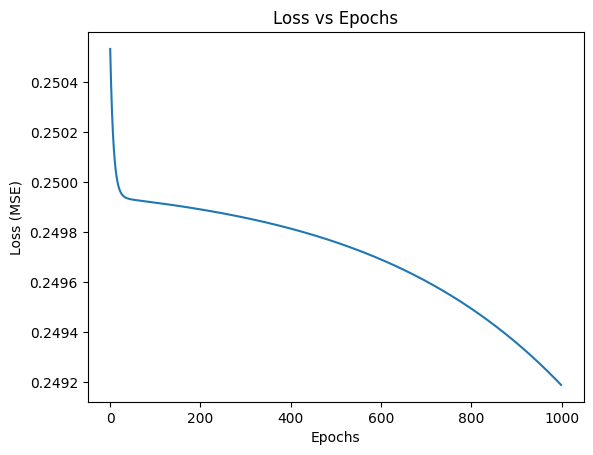

In [35]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss vs Epochs")
plt.show()

In [36]:
test_input = np.array([[1, 0]])

z1_test = np.dot(test_input, W1) + b1
a1_test = sigmoid(z1_test)

z2_test = np.dot(a1_test, W2) + b2
prediction = sigmoid(z2_test)

print("Test Input:", test_input)
print("Predicted Output:", prediction)


Test Input: [[1 0]]
Predicted Output: [[0.49097994]]
